In [321]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso
from sklearn import metrics


In [322]:
df=pd.read_csv(r"C:\Users\OM RAJ PANDEY\Desktop\archive (1)\car_price.csv")

In [323]:
df.head()

,Unnamed: 0,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats
0,0,Jeep Compass 2.0 Longitude Option BSIV,10.03 Lakh,"86,226 kms",Diesel,Manual,1st Owner,2017,1956 cc,5 Seats
1,1,Renault Duster RXZ Turbo CVT,12.83 Lakh,"13,248 kms",Petrol,Automatic,1st Owner,2021,1330 cc,5 Seats
2,2,Toyota Camry 2.5 G,16.40 Lakh,"60,343 kms",Petrol,Automatic,1st Owner,2016,2494 cc,5 Seats
3,3,Honda Jazz VX CVT,7.77 Lakh,"26,696 kms",Petrol,Automatic,1st Owner,2018,1199 cc,5 Seats
4,4,Volkswagen Polo 1.2 MPI Highline,5.15 Lakh,"69,414 kms",Petrol,Manual,1st Owner,2016,1199 cc,5 Seats


In [190]:
df.shape

(5512, 10)

In [191]:
#Getting some information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5512 entries, 0 to 5511
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           5512 non-null   int64 
 1   car_name             5512 non-null   object
 2   car_prices_in_rupee  5512 non-null   object
 3   kms_driven           5512 non-null   object
 4   fuel_type            5512 non-null   object
 5   transmission         5512 non-null   object
 6   ownership            5512 non-null   object
 7   manufacture          5512 non-null   int64 
 8   engine               5512 non-null   object
 9   Seats                5512 non-null   object
dtypes: int64(2), object(8)
memory usage: 430.8+ KB


In [192]:
#checking the number of missing values
df.isnull().sum()

Unnamed: 0             0
car_name               0
car_prices_in_rupee    0
kms_driven             0
fuel_type              0
transmission           0
ownership              0
manufacture            0
engine                 0
Seats                  0
dtype: int64

In [193]:
df.describe(include='all')

,Unnamed: 0,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats
count,5512.000000,5512,5512,5512,5512,5512,5512,5512.000000,5512,5512
unique,NaN,1896,1300,2610,5,2,6,NaN,139,6
top,NaN,Maruti Alto 800 LXI,4.50 Lakh,"80,000 kms",Petrol,Manual,1st Owner,NaN,1197 cc,5 Seats
freq,NaN,53,62,163,2967,3962,3736,NaN,714,4673
mean,2755.500000,NaN,NaN,NaN,NaN,NaN,NaN,2015.455552,NaN,NaN
std,1591.321673,NaN,NaN,NaN,NaN,NaN,NaN,3.927974,NaN,NaN
min,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,1995.000000,NaN,NaN
25%,1377.750000,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN
50%,2755.500000,NaN,NaN,NaN,NaN,NaN,NaN,2016.000000,NaN,NaN
75%,4133.250000,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN


In [194]:
from sklearn.preprocessing import LabelEncoder
le1=LabelEncoder()
df['car_name']=le1.fit_transform(df['car_name'])
le2=LabelEncoder()
df['car_prices_in_rupee']=le2.fit_transform(df['car_prices_in_rupee'])
le3=LabelEncoder()
df['kms_driven']=le3.fit_transform(df['kms_driven'])
le4=LabelEncoder()
df['fuel_type']=le4.fit_transform(df['fuel_type'])
le5=LabelEncoder()
df['transmission']=le5.fit_transform(df['transmission'])
le6=LabelEncoder()
df['ownership']=le6.fit_transform(df['ownership'])
le7=LabelEncoder()
df['engine']=le7.fit_transform(df['engine'])
le8=LabelEncoder()
df['Seats']=le8.fit_transform(df['Seats'])

In [195]:
df.head()

,Unnamed: 0,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats
0,0,743,110,2351,1,1,1,2017,60,2
1,1,1444,210,491,4,0,1,2021,19,2
2,2,1706,302,1733,4,0,1,2016,88,2
3,3,385,1110,820,4,0,1,2018,14,2
4,4,1831,836,1929,4,1,1,2016,14,2


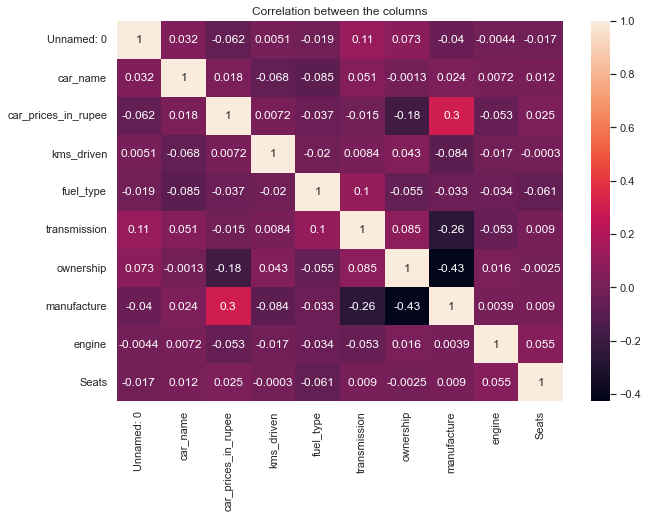

In [196]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot=True)
plt.title('Correlation between the columns')
plt.show()

Unnamed: 0                AxesSubplot(0.125,0.772143;0.110714x0.107857)
car_name               AxesSubplot(0.257857,0.772143;0.110714x0.107857)
car_prices_in_rupee    AxesSubplot(0.390714,0.772143;0.110714x0.107857)
kms_driven             AxesSubplot(0.523571,0.772143;0.110714x0.107857)
fuel_type              AxesSubplot(0.656429,0.772143;0.110714x0.107857)
transmission           AxesSubplot(0.789286,0.772143;0.110714x0.107857)
ownership                 AxesSubplot(0.125,0.642714;0.110714x0.107857)
manufacture            AxesSubplot(0.257857,0.642714;0.110714x0.107857)
engine                 AxesSubplot(0.390714,0.642714;0.110714x0.107857)
Seats                  AxesSubplot(0.523571,0.642714;0.110714x0.107857)
dtype: object

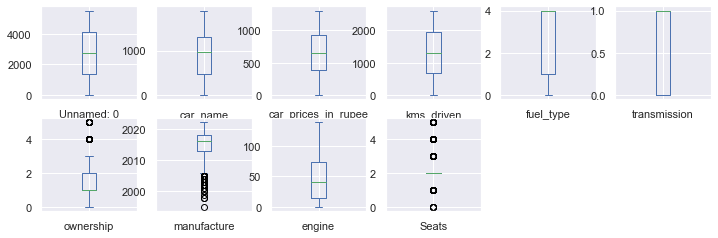

In [197]:
df.plot(kind='box',figsize=(12,12),layout=(6,6),sharex=False,subplots=True)

<AxesSubplot:xlabel='manufacture', ylabel='car_prices_in_rupee'>

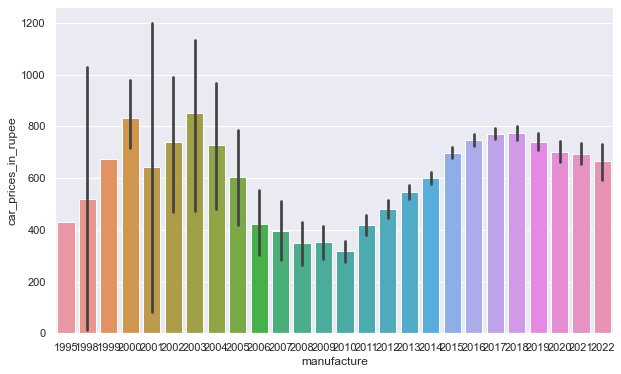

In [198]:
plt.figure(figsize=(10,6))
sns.barplot(x='manufacture',y='car_prices_in_rupee',data=df)

In [199]:
q1=df.manufacture.quantile(0.25)
q3=df.manufacture.quantile(0.75)
q1,q3

(2013.0, 2018.0)

In [200]:
iqr=q3-q1
iqr

5.0

In [201]:
lower_limit=q1-1.5*iqr
upper_limit=q3+1.5*iqr
lower_limit,upper_limit

(2005.5, 2025.5)

In [202]:
df[(df.manufacture<lower_limit)|(df.manufacture>upper_limit)]

,Unnamed: 0,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats
152,152,213,694,80,1,1,2,2005,102,4
216,216,1250,34,2126,4,1,2,2005,137,2
243,243,1288,934,2440,4,1,3,2002,135,2
286,286,1290,694,255,4,1,2,2004,135,2
367,367,1292,11,2440,4,1,3,1998,135,2
...,...,...,...,...,...,...,...,...,...,...
4633,4633,1686,958,660,4,0,1,2002,17,2
4643,4643,472,11,1182,4,1,2,2005,131,2
4841,4841,1262,1,1701,4,1,1,2002,16,2
5113,5113,1724,390,1723,4,1,2,2005,17,2


In [203]:
df2=df[(df.manufacture>lower_limit)&(df.manufacture<upper_limit)]
df2

,Unnamed: 0,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats
0,0,743,110,2351,1,1,1,2017,60,2
1,1,1444,210,491,4,0,1,2021,19,2
2,2,1706,302,1733,4,0,1,2016,88,2
3,3,385,1110,820,4,0,1,2018,14,2
4,4,1831,836,1929,4,1,1,2016,14,2
...,...,...,...,...,...,...,...,...,...,...
5507,5507,82,538,1287,1,0,1,2018,110,4
5508,5508,79,1041,872,4,0,2,2015,61,2
5509,5509,720,233,2440,1,0,2,2013,98,2
5510,5510,74,546,2169,1,0,3,2015,104,3


manufacture    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

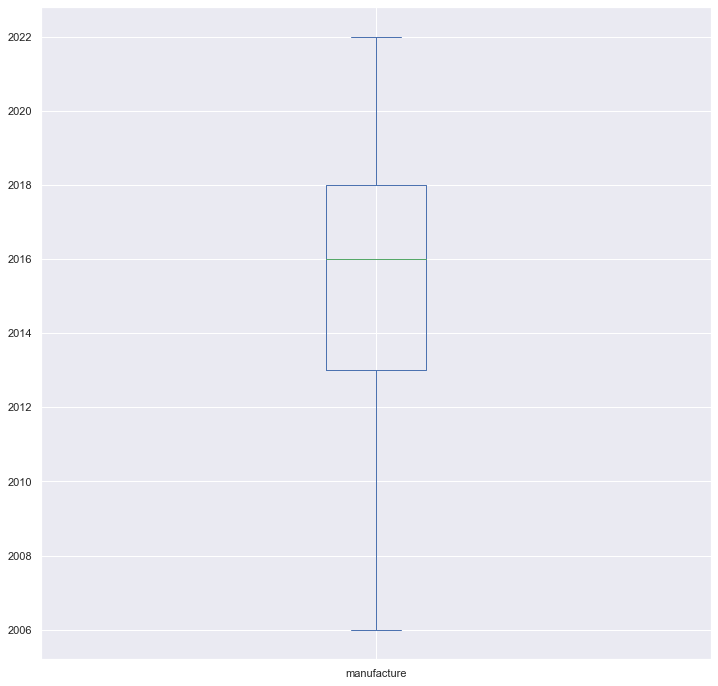

In [204]:
df2['manufacture'].plot(kind='box',figsize=(12,12),sharex=False,subplots=True)

In [205]:
df2.skew()

Unnamed: 0            -0.005114
car_name               0.022006
car_prices_in_rupee   -0.096393
kms_driven            -0.067342
fuel_type             -0.179234
transmission          -0.958378
ownership              1.748506
manufacture           -0.386200
engine                 0.799028
Seats                  2.075957
dtype: float64

In [206]:
np.log(df2['car_name'])
np.log(df2['kms_driven'])
np.log(df2['fuel_type'])
np.log(df2['transmission'])
np.log(df2['ownership'])
np.log(df2['manufacture'])
np.log(df2['engine'])
np.log(df2['Seats'])

C:\Users\OM RAJ PANDEY\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


0       0.693147
1       0.693147
2       0.693147
3       0.693147
4       0.693147
          ...   
5507    1.386294
5508    0.693147
5509    0.693147
5510    1.098612
5511    0.693147
Name: Seats, Length: 5437, dtype: float64

In [207]:
from sklearn.preprocessing import StandardScaler
object=StandardScaler()


# Model Building

In [294]:
#separating the data and label
x=df2.drop(columns=['Unnamed: 0','car_prices_in_rupee','manufacture'],axis=1)
y=df2['car_prices_in_rupee']

In [295]:
x=object.fit_transform(x)
print(x)

[[-0.33520244  1.41332159 -1.05998209 ... -0.59587295  0.16339985
  -0.35122681]
 [ 1.02077219 -1.09388011  0.92547586 ... -0.59587295 -0.80552003
  -0.35122681]
 [ 1.52757013  0.5802836   0.92547586 ... -0.59587295  0.82510124
  -0.35122681]
 ...
 [-0.37969234  1.53328984 -1.05998209 ...  0.85044903  1.06142317
  -0.35122681]
 [-1.62927809  1.16799325 -1.05998209 ...  2.29677101  1.20321632
   1.04367469]
 [-1.65249021 -0.12200246 -1.05998209 ...  0.85044903  0.28156082
  -0.35122681]]


In [296]:
print(x)
print(y)

[[-0.33520244  1.41332159 -1.05998209 ... -0.59587295  0.16339985
  -0.35122681]
 [ 1.02077219 -1.09388011  0.92547586 ... -0.59587295 -0.80552003
  -0.35122681]
 [ 1.52757013  0.5802836   0.92547586 ... -0.59587295  0.82510124
  -0.35122681]
 ...
 [-0.37969234  1.53328984 -1.05998209 ...  0.85044903  1.06142317
  -0.35122681]
 [-1.62927809  1.16799325 -1.05998209 ...  2.29677101  1.20321632
   1.04367469]
 [-1.65249021 -0.12200246 -1.05998209 ...  0.85044903  0.28156082
  -0.35122681]]
0        110
1        210
2        302
3       1110
4        836
        ... 
5507     538
5508    1041
5509     233
5510     546
5511     650
Name: car_prices_in_rupee, Length: 5437, dtype: int32


In [297]:
# Train-Test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [298]:
# Import the models
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [299]:
# Model Training
lr=LinearRegression()
lr.fit(x_train,y_train)
svm=SVR()
svm.fit(x_train,y_train)
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
gr=GradientBoostingRegressor()
gr.fit(x_train,y_train)

GradientBoostingRegressor()

In [300]:
#Prediction on Test Data
y_pred1=lr.predict(x_test)
y_pred2=svm.predict(x_test)
y_pred3=rf.predict(x_test)
y_pred4=gr.predict(x_test)

In [301]:
df3=pd.DataFrame({'Actual':y_test, 'lr':y_pred1, 'svm':y_pred2, 'rf':y_pred3, 'gr':y_pred4})
df3

,Actual,lr,svm,rf,gr
3260,800,730.769513,652.743293,776.54,763.819856
4585,1254,681.016332,646.502444,817.77,701.545055
2178,446,477.906002,598.003634,350.41,369.514266
3161,756,657.482999,646.488874,768.95,593.050291
892,100,669.789371,682.642975,221.77,525.044753
...,...,...,...,...,...
1966,873,671.847989,668.626840,860.79,815.086817
1061,644,687.399067,671.236036,861.68,806.844593
1655,982,656.736207,668.692782,857.63,804.120569
2509,98,475.232957,573.088315,426.05,443.697357


compare performance visually

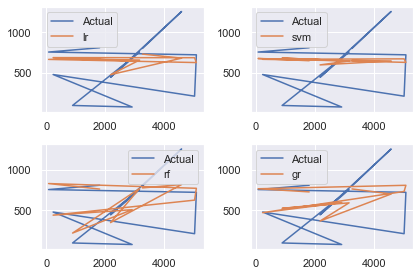

In [302]:
plt.subplot(221)
plt.plot(df3['Actual'].iloc[0:11], label='Actual')
plt.plot(df3['lr'].iloc[0:11], label='lr')
plt.legend()

plt.subplot(222)
plt.plot(df3['Actual'].iloc[0:11], label='Actual')
plt.plot(df3['svm'].iloc[0:11], label="svm")
plt.legend()

plt.subplot(223)
plt.plot(df3['Actual'].iloc[0:11], label='Actual')
plt.plot(df3['rf'].iloc[0:11], label="rf")
plt.legend()

plt.subplot(224)
plt.plot(df3['Actual'].iloc[0:11], label='Actual')
plt.plot(df3['gr'].iloc[0:11], label="gr")
plt.tight_layout()
plt.legend()

In [303]:
#Evauating the Algorithm
score1=metrics.r2_score(y_test,y_pred1)
score2=metrics.r2_score(y_test,y_pred2)
score3=metrics.r2_score(y_test,y_pred3)
score4=metrics.r2_score(y_test,y_pred4)

In [304]:
print(score1, score2, score3, score4)

0.03843381909447152 0.030774470579602142 0.4066034363830774 0.2521758208304966


In [305]:
s1=metrics.mean_absolute_error(y_test,y_pred1)
s2=metrics.mean_absolute_error(y_test,y_pred2)
s3=metrics.mean_absolute_error(y_test,y_pred3)
s4=metrics.mean_absolute_error(y_test,y_pred4)

In [306]:
print(s1, s2, s3, s4)

285.91490092768163 287.78114724479025 193.4867524509804 241.50375523841285


In [307]:
#mean_squared_error
t1=metrics.mean_squared_error(y_test,y_pred1)
t2=metrics.mean_squared_error(y_test,y_pred2)
t3=metrics.mean_squared_error(y_test,y_pred3)
t4=metrics.mean_squared_error(y_test,y_pred4)

In [308]:
print(t1,t2,t3,t4)

116216.11311542644 117141.8317306093 71718.6643301726 90382.98259925237


In [309]:
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV

In [310]:
lasscv=LassoCV(alphas=None, max_iter=100)
lasscv.fit(x_train,y_train)

LassoCV(max_iter=100)

In [311]:
alpha=lasscv.alpha_
alpha

1.6858910978487553

In [312]:
lasso_reg=Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=1.6858910978487553)

In [313]:
lasso_reg.score(x_test,y_test)

0.0386227970829639

In [314]:
#Using Ridge Regression model
ridgecv=RidgeCV(alphas=np.arange(0.001,0.1,0.01))
ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]))

In [315]:
ridgecv.alpha_

0.09099999999999998

In [316]:
ridge_model=Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train,y_train)

Ridge(alpha=0.09099999999999998)

In [317]:
ridge_model.score(x_test,y_test)

0.038433731892584366

In [318]:
#hyperparameter tuning
grid_param={'criterion':['friedman_mse'],'max_depth':range(10,15),'min_samples_leaf':range(2,6),'min_samples_split':range(3,8),'max_leaf_nodes':range(5,10)}


In [319]:
grid_search=GridSearchCV(estimator=gr,param_grid=grid_param,cv=5,n_jobs=-1)

In [320]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'criterion': ['friedman_mse'],
                         'max_depth': range(10, 15),
                         'max_leaf_nodes': range(5, 10),
                         'min_samples_leaf': range(2, 6),
                         'min_samples_split': range(3, 8)})

In [237]:
best_parameters=grid_search.best_params_
print(best_parameters)

{'criterion': 'friedman_mse', 'max_depth': 10, 'max_leaf_nodes': 9, 'min_samples_leaf': 5, 'min_samples_split': 3}


In [238]:
gr=GradientBoostingRegressor(criterion= 'friedman_mse', max_depth= 10, max_leaf_nodes= 9, min_samples_leaf= 5, min_samples_split= 4)
gr.fit(x_train,y_train)

GradientBoostingRegressor(max_depth=10, max_leaf_nodes=9, min_samples_leaf=5,
                          min_samples_split=4)

In [239]:
y_pred=gr.predict(x_test)
score=metrics.r2_score(y_test,y_pred)
print(score)

0.41670478201543737


In [240]:
#cross validation score
c1=cross_val_score(lr,x_test,y_test,cv=4)
c2=cross_val_score(svm,x_test,y_test,cv=4)
c3=cross_val_score(rf,x_test,y_test,cv=4)
c4=cross_val_score(gr,x_test,y_test,cv=4)

In [241]:
print("Linear Regression model accuracy is:{}".format(c1.mean()*100))

Linear Regression model accuracy is:10.798087264546947


In [242]:
print("SVR model accuracy is:{}".format(c2.mean()*100))

SVR model accuracy is:2.28163662630432


In [243]:
print("RandomForestRegressor model accuracy is:{}".format(c3.mean()*100))

RandomForestRegressor model accuracy is:27.5304356106364


In [244]:
print("GradientBoostingRegressor model accuracy is:{}".format(c4.mean()*100))

GradientBoostingRegressor model accuracy is:29.454990194728957


In [245]:
df2.columns

Index(['Unnamed: 0', 'car_name', 'car_prices_in_rupee', 'kms_driven',
       'fuel_type', 'transmission', 'ownership', 'manufacture', 'engine',
       'Seats'],
      dtype='object')

In [325]:
df2.tail()

,Unnamed: 0,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats
5507,5507,82,538,1287,1,0,1,2018,110,4
5508,5508,79,1041,872,4,0,2,2015,61,2
5509,5509,720,233,2440,1,0,2,2013,98,2
5510,5510,74,546,2169,1,0,3,2015,104,3
5511,5511,62,650,1212,1,0,2,2017,65,2


In [329]:
data={'car_name':720,'kms_driven':2440,'fuel_type':4,'transmission':0,'ownership':2
     ,'engine':61,'Seats':2}
df5=pd.DataFrame(data, index=[0])
df5

,car_name,kms_driven,fuel_type,transmission,ownership,engine,Seats
0,720,2440,4,0,2,61,2


In [330]:
new_pred=gr.predict(df5)
print(new_pred)

[744.90068393]


C:\Users\OM RAJ PANDEY\anaconda3\lib\site-packages\sklearn\base.py:402: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  warnings.warn(


In [331]:
#Save Model Using Joblib
gr=GradientBoostingRegressor()
gr.fit(x,y)

GradientBoostingRegressor()

In [332]:
import joblib

In [333]:
joblib.dump(gr, 'model_joblib_gr')

['model_joblib_gr']

In [334]:
model=joblib.load('model_joblib_gr')

In [335]:
model.predict(df5)

C:\Users\OM RAJ PANDEY\anaconda3\lib\site-packages\sklearn\base.py:402: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  warnings.warn(


array([510.56645617])